In [1]:
!pip3 install qiskit ipywidgets

In [2]:
!pip3 install pylatexenc

In [3]:
!pip3 install qiskit-aer

## Qubit Tunggal

In [4]:
import numpy as np
import math
from math import sqrt
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import Aer
from qiskit import BasicAer
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit import transpile

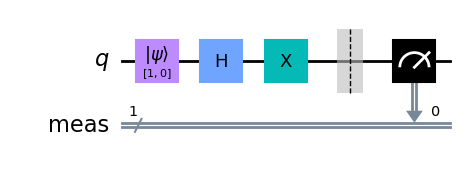

In [5]:


# Define state |psi>
#initial_state = [1/sqrt(5), 2/sqrt(5)]   # jumlah kuadrat amplitudo harus = 1
#initial_state = [3/5, 4/5]               # Psi_0 = 3/5|0> + 4/5|1> 
#initial_state = [sqrt(0.4), sqrt(0.6)]    # Psi_0 = 0.4|0> + 0.6|1>
#initial_state = [1/sqrt(2), 1/sqrt(2)]   
initial_state = [1, 0]                   # Psi_0 = |0>

# Redefine the quantum circuit
qc = QuantumCircuit(1)                    # membuat quantum circuit 1-qubit

# Initialise the 0th qubit in the state `initial_state`
qc.initialize(initial_state, 0)           # inisialisasi pada  qubit ke-0; q0 = Psi_0 = |0>
#print('State Qubit awal')
#display(plot_bloch_multivector(qc))
qc.h(0)                                   # H(q0)  
qc.x(0)                                   # X(q0)
print()
#print('State Qubit hasil operasi')
#display(plot_bloch_multivector(qc))
qc.measure_all()                          # Pengukuran State Qubit akhir
qc.draw(output="mpl")                     # Menggambar Quantum Circuit

In [6]:
simulator = Aer.get_backend("aer_simulator") # simulasi kuantum dilakukan di komputer lokal
qc.save_statevector()
tqc = transpile(qc, simulator)
job = simulator.run(tqc)
result = job.result()
statevector = result.get_statevector(tqc, 4)
print(statevector)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


{'1': 483, '0': 517}


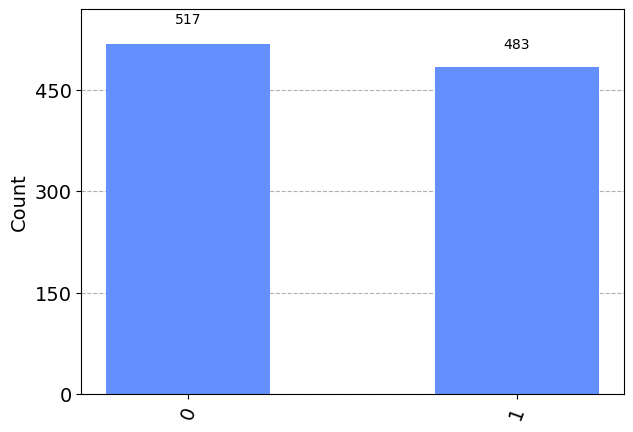

In [7]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
# Return counts
counts = job.result().get_counts(qc)
print(counts)
plot_histogram(counts)

### Multiple Qubit

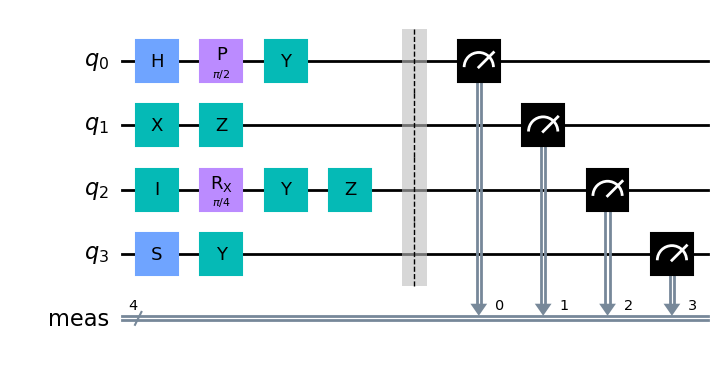

In [8]:
qc = QuantumCircuit(4)
qc.h(0)                                 # H(q0)
qc.i(2)                                 # I(q2)
qc.p(math.pi/2,0)                       # P(q0)
qc.rx(math.pi/4,2)                      # Rx(q2)
qc.s(3)                                 # S(q3)
qc.x(1)                                 # X(q1)
qc.y([0,2,3])                           # Y(q0) Y(q2) Y(q3)
qc.z([1,2])                             # Z(q1) Z(z2)
#print('State Qubit hasil operasi')
#display(plot_bloch_multivector(qc))
qc.measure_all()                          # Pengukuran State Qubit
display(qc.draw(output="mpl"))            # Menggambar Quantum Circuit

In [9]:
simulator = Aer.get_backend("aer_simulator")
qc.save_statevector()
tqc = transpile(qc, simulator)
job = simulator.run(tqc)
result = job.result()
statevector = result.get_statevector(tqc, 4)
print(statevector)

Statevector([ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
              0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -0.+0.j,  0.+0.j,  0.+0.j,
             -1.+0.j,  0.+0.j],
            dims=(2, 2, 2, 2))


{'1010': 85, '1111': 420, '1110': 422, '1011': 73}


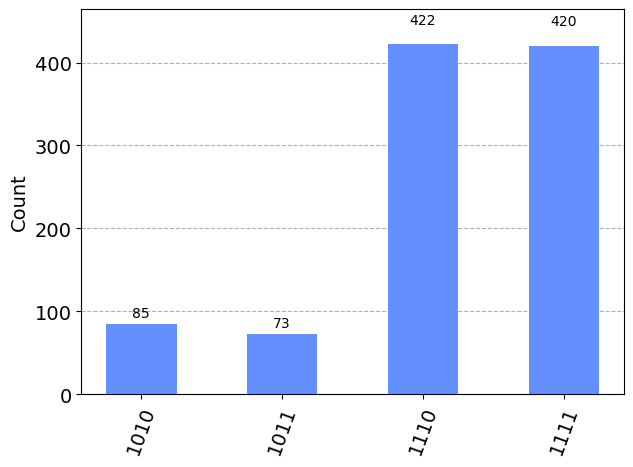

In [10]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
# Return counts
counts = job.result().get_counts(qc)
print(counts)
plot_histogram(counts)

### Multiple Qubit: Entanglement

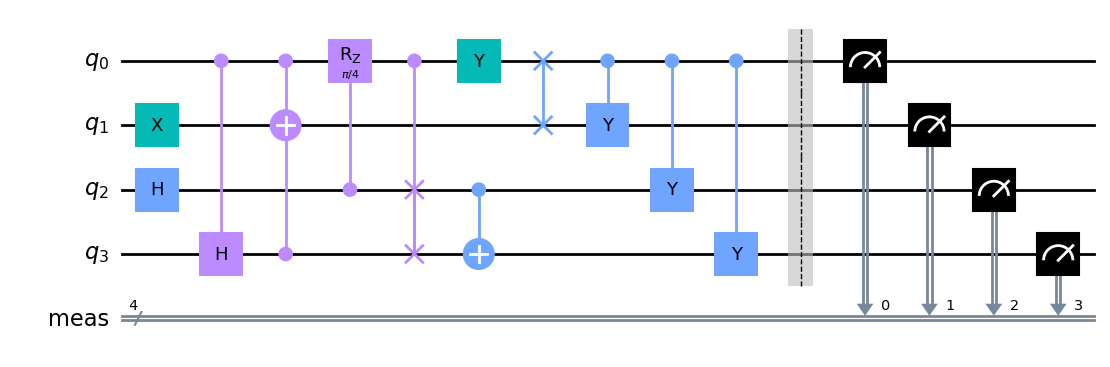

In [11]:
qc = QuantumCircuit(4)
qc.h(2)                              # H(q2)
qc.ch(0,3)                           # Control H, q0=kontrol    q3 = target
qc.x(1)                              # X(q1)
qc.ccx(3,0,1)                        # Control-control X, q0 dan q3 = kontrol      q1 = target
qc.crz(math.pi/4,2,0)                # Control Rz,               q2 = kontrol      q0 = target
qc.cswap(0,2,3)                      # Control swap,       q0 = kontrol            q2 dan q3 melakukan swap
qc.cnot(2,3)
qc.y(0)
qc.swap(0,1)
qc.cy(0,[1,2,3])                     #Control Y,  q0 = kontrol         q1,q2,q3 = target
#print('State Qubit hasil operasi')
#display(plot_bloch_multivector(qc))
qc.measure_all()                          # Pengukuran State Qubit
display(qc.draw(output="mpl"))            # Menggambar Quantum Circuit

In [12]:
simulator = Aer.get_backend("aer_simulator")
qc.save_statevector()
tqc = transpile(qc, simulator)
job = simulator.run(tqc)
result = job.result()
statevector = result.get_statevector(tqc, 4)
print(statevector)

Statevector([ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
              0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,
              0.+0.j,  0.+0.j],
            dims=(2, 2, 2, 2))


{'0001': 528, '1101': 472}


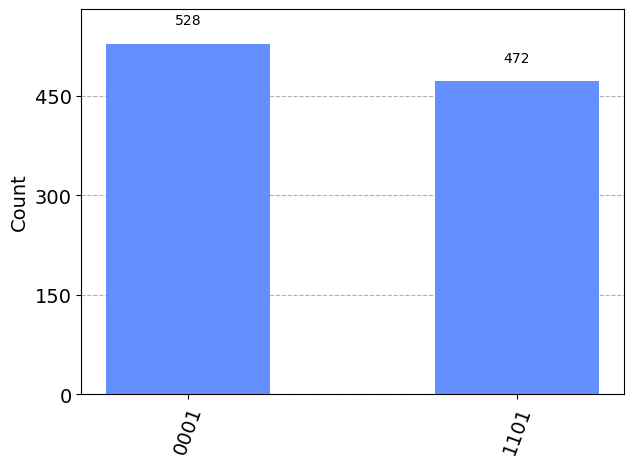

In [13]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
# Return counts
counts = job.result().get_counts(qc)
print(counts)
plot_histogram(counts)